In [26]:
"""
This module contain MSA class and associated functions
Author: Khoa Hoang
Date: Fed 5th, 2024
"""

import numpy as np

from seq_utils import onehot
from stats_utils import calculate_entropy_from_counts
from dna_feat_extractor import generate_dotplot


class MSA:
    def __init__(self, anchor, seqs, aligned_seqs, alphabet_dict, counts):
        self.anchor = anchor
        self.seqs = seqs
        self.aligned_seqs = aligned_seqs
        self.alphabet_dict = alphabet_dict
        self.counts = counts
        self.entropy = calculate_entropy_from_counts(self.counts)
        self.lengths = [len(seq) for seq in self.seqs]
        
    @property
    def seq_image(self):
        onehot_vect = onehot(self.aligned_seqs, self.alphabet_dict)
        return onehot_vect
        
    @property
    def prob_matrix(self):
        return (self.seq_image.sum(dim=0).T / self.seq_image.sum(dim=[0, 2])).T
    
    @property
    def pairwise_lev_dist(self):
        n = len(self.aligned_seqs)
        m = len(self.aligned_seqs[0])
        dist = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                dist[i, j] = sum(
                    [
                        self.aligned_seqs[i][k] != self.aligned_seqs[j][k]
                        for k in range(m)
                    ]
                )
        return dist

    @property
    def max_lev_dist(self):
        return np.max(self.pairwise_lev_dist)

    @property
    def average_lev_dist(self):
        return np.mean(self.pairwise_lev_dist)

    @property
    def highest_count_seq(self):
        return self.seqs[np.argmax(self.counts)]
    
    @property
    def dotplot_highest_count_seq(self):
        return generate_dotplot(self.highest_count_seq, self.highest_count_seq)

    @property
    def longest_seq(self):
        return max(self.seqs, key=len)

    @property
    def mean_length(self):
        return np.mean(self.lengths)
    
    @property
    def max_length(self):
        return np.max(self.lengths)
    
    @property
    def min_length(self):
        return np.min(self.lengths)
    
    def __str__(self):
        return str(self.aligned_seqs)


if __name__ == "__main__":

    aligned_seqs = ["ATG--C", "ATGAAC", "ATGGGC"]
    seqs = ["ATGC", "ATGAAC", "ATGGGC"]
    alphabet_dict = {"-": 0, "A": 1, "C": 2, "G": 3, "T": 4}
    msa = MSA("AA", seqs, aligned_seqs, alphabet_dict, [1, 2, 3])
    print(msa.anchor)
    print(msa.prob_matrix)
    print(msa.pairwise_lev_dist)
    print(msa.max_lev_dist)
    print(msa.average_lev_dist)
    print(msa.dotplot_highest_count_seq)
    print(msa.entropy)
    print(msa.lengths)
    print(msa.mean_length)
    print(onehot(msa.aligned_seqs, msa.alphabet_dict).shape)

AA
tensor([[0.0000, 1.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 1.0000, 0.0000],
        [0.3333, 0.3333, 0.0000, 0.3333, 0.0000],
        [0.3333, 0.3333, 0.0000, 0.3333, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000]])
[[0. 2. 2.]
 [2. 0. 2.]
 [2. 2. 0.]]
2.0
1.3333333333333333
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
1.0114042647073518
[4, 6, 6]
5.333333333333333
torch.Size([3, 6, 5])


In [1]:
import matplotlib.pyplot as plt

# Example data
strings = ["TACATGGGAAGCAGTGGTATCAACGCCTGTCTCTTATACACATCTCCGAGCCCACGAGACCTGCCGAGTCTTATCTCGTATGCCGTCTTCTG",\
           "TACATGGGAAGCAGTGGTATCAACGCCTGTCTCTTATACACATCTCCGAGCCCACGAGACTTCCACAATCTGATCTCGTATGCCGTCTT--",\
           "TACATGGGAAGCAGTGGTATCAACGCCTGTCTCTTATACACATCTCCGAGCCCACGAGACTTCCACAATCTGATCTCGTATGCCGTCTT--"]
numbers = np.linspace(0,1, len(strings[0]))


def viz_sequence_importance(seqs, attributions):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot each string with characters colored according to the list of numbers
    for si, string in enumerate(seqs):
        for idx, char in enumerate(seqs):
            color_index = idx % len(numbers)  # Cycle through numbers list
            ax.text(idx * 0.05, 1 - si * 0.2, char, 
                    color=plt.cm.RdYlGn(numbers[color_index] / max(numbers)), fontsize=20)
    ax.set_ylim(-1, 1)
    ax.axis('off')
    plt.show()


NameError: name 'np' is not defined

In [40]:
numbers

array([-1.,  0.,  1.])

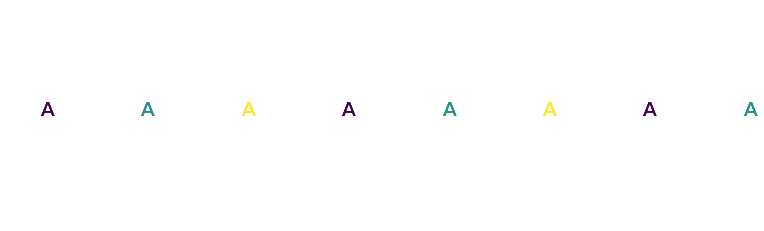

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
strings = ["AAAAAAAA", "AAAAAAAA", "AAAAAAAA"]
k = len(strings) // 2  # Assuming k is the number of characters in each string

# Generate a list of continuous numbers from -k to k
numbers = np.linspace(-k, k, num=2*k+1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot each string with characters colored according to the continuous range of numbers
for string in strings:
    for idx, char in enumerate(string):
        color_index = idx % len(numbers)  # Cycle through numbers list
        normalized_number = (numbers[color_index] + k) / (2 * k)  # Normalize to range [0, 1]
        ax.text(0.1 + idx * 0.3, 0.5 - strings.index(string) * 0.1, char, 
                color=plt.cm.viridis(normalized_number), fontsize=20)

# Set y-axis limit
ax.set_ylim(0, 1)

# Remove axis
ax.axis('off')

# Show plot
plt.show()


In [3]:
alphabet_dict = {"p": 0, "-": 1, "A": 2, "C": 3, "G": 4, "T": 5}
lab2onehot =  lambda seq: torch.eye(len(alphabet_dict))[seq]
seq2lab = lambda seq: torch.tensor([alphabet_dict[i] for i in seq])

In [4]:
def label(seqs, alphabet_dict):
    assert any(seqs), "empty sequence input"
    assert any([len(seq) != len(seq[0]) for seq in seqs])
    encoded_seqs = torch.ones((len(seqs), len(seqs[0])))
    for i,seq in enumerate(seqs):
        encoded_seq = torch.tensor([alphabet_dict[a] for a in seq])
        encoded_seqs[i,:] = encoded_seq
    return encoded_seqs

def onehot(seqs, alphabet_dict):
    assert any(seqs), "empty sequence input"
    assert any([len(seq) != len(seq[0]) for seq in seqs])
    encoded_seqs = torch.ones((len(seqs), len(seqs[0]), len(alphabet_dict)))
    for i,seq in enumerate(seqs):
        encoded_seq = seq2lab(seq)
        encoded_seq_onehot = lab2onehot(encoded_seq)
        encoded_seqs[i,:,:] = encoded_seq_onehot
    return encoded_seqs

def calculate_prob_matrix(seqs, alphabet_dict):    
    onehot_vect = onehot(seqs, alphabet_dict)
    return (onehot_vect.sum(dim=0).T / onehot_vect.sum(dim=[0,2])).T

In [5]:
class Autoencoder(nn.Module):
    def __init__(self, num_channels):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv1d(num_channels, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(64, 32, kernel_size=3, stride=1, padding=1, output_padding=0),
            nn.ReLU(),
            nn.ConvTranspose1d(32, num_channels, kernel_size=3, stride=1, padding=1, output_padding=0),
            nn.Sigmoid()            
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
df_aligned = pd.read_csv("C:/Users/khoah/PhD_Documents/SPLASH/compactor_classified_small_aligned.csv")


In [7]:
msas = df_aligned.groupby("anchor_index").agg(list).aligned_compactor.to_list()
msa_prob_encoded = [calculate_prob_matrix(msa, alphabet_dict) for msa in msas]
padded_sequences = pad_sequence(msa_prob_encoded, batch_first=True, padding_value=0)
input_seqs = torch.swapaxes(padded_sequences, 1,2)

In [8]:
# divide into train and test set
train_size = int(0.8 * len(input_seqs))
test_size = len(input_seqs) - train_size
train_set, test_set = torch.utils.data.random_split(input_seqs, [train_size, test_size])
print("train set size: ", len(train_set))
print("test set size: ", len(test_set))

train set size:  1765
test set size:  442


In [9]:
# use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")
# Instantiate the model
model = Autoencoder(6)

# Choose a loss function (e.g., Mean Squared Error) and an optimizer (e.g., Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_set.dataset)
    loss = criterion(outputs, train_set.dataset)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    outputs = model(test_set.dataset)
    loss = criterion(outputs, test_set.dataset)
    print(f'Test loss: {loss.item():.4f}')

Using cpu device
Epoch [1/100], Loss: 0.2306
Epoch [2/100], Loss: 0.2277
Epoch [3/100], Loss: 0.2249
Epoch [4/100], Loss: 0.2219
Epoch [5/100], Loss: 0.2185
Epoch [6/100], Loss: 0.2147
Epoch [7/100], Loss: 0.2105
Epoch [8/100], Loss: 0.2059
Epoch [9/100], Loss: 0.2007
Epoch [10/100], Loss: 0.1950
Epoch [11/100], Loss: 0.1887
Epoch [12/100], Loss: 0.1818
Epoch [13/100], Loss: 0.1744
Epoch [14/100], Loss: 0.1665
Epoch [15/100], Loss: 0.1582
Epoch [16/100], Loss: 0.1496
Epoch [17/100], Loss: 0.1408
Epoch [18/100], Loss: 0.1322
Epoch [19/100], Loss: 0.1239
Epoch [20/100], Loss: 0.1163
Epoch [21/100], Loss: 0.1095
Epoch [22/100], Loss: 0.1037
Epoch [23/100], Loss: 0.0991
Epoch [24/100], Loss: 0.0957
Epoch [25/100], Loss: 0.0933
Epoch [26/100], Loss: 0.0920
Epoch [27/100], Loss: 0.0913
Epoch [28/100], Loss: 0.0911
Epoch [29/100], Loss: 0.0911
Epoch [30/100], Loss: 0.0912
Epoch [31/100], Loss: 0.0912
Epoch [32/100], Loss: 0.0911
Epoch [33/100], Loss: 0.0907
Epoch [34/100], Loss: 0.0901
Epoch 

In [ ]:
plt.plot(outputs[0].T)

In [45]:
# Visualize the first 10 input images and then reconstructed images
with torch.no_grad():
    input_images = test_set.dataset[:10]
    outputs = model(input_images)

    # Plot the first ten input images and then reconstructed images
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(input_images[i].squeeze(), cmap='gray')
        plt.subplot(2, 10, i + 1 + 10)
        plt.imshow(outputs[i].squeeze(), cmap='gray')
    plt.show()

: 

In [1]:
def generate_dotplot(seq1, seq2, window_size=1):
    """
    Function to generate a dotplot of two DNA sequences
    """
    dotplot = np.zeros((len(seq1), len(seq2)))
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i : i + window_size] == seq2[j : j + window_size]:
                dotplot[i, j] = 1
    return dotplot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
seq = "ATTGCGTTGCTCACCCCTTAACAGGGCGTTATAGCAAAGGAGATAAACGTTGAGTAAGTCAATATTAATAGGTTCGTTAGT"

In [3]:
seq = "A CTG AAATT TATTGAA CGA CACTG GGGTT GC GAAATG GAGG TTTT TCTCTCC TCTC GCATT TCC CTGAA CTG CGAGA GGA GAGAAAAA CCTC CATT TCGCTG TCTCTA GTAAA GAGCTA GCAACAA CCCAA GTTAATT TATA CTTGG GTT GTTTA CTCTT AAAA GGA CAAAATT GAATATA CTAA CCA CATTAA GAGA GCAA CTTTTAA CAAA CAATG TAATTA TGCC TCAGGA GTTCGAGA GACTT GAGG TTA GAGG CTC TCATG CATA TAAGG TATA CTCAATT CCCAAAA GAAAA GCAGG GCGG CGGA CAA TCGC GCA TCCTT CTAGTAA GCTCAAAA TTTG TCAGC GCCATT TGAATG CTA TCCTAAA TCCA TTATT GAAGG TACATGA CTCAA GCTATG CATATG TCAA GGGTA GAAGTA TAAAA GATAATG CTC TAGTA CACA GTCA CTCTGCC TATG TATTAAAAA TGGA CTT CCAAAA TTTTTT TAATA GTATTA CTCCAA CCATT CTA CGA CAATGTT TAATT CAAAA TGACATT CTA CTTTCA GTAAA TGAGTTA GAAAAA CTAGAA CAATT GATATT CTGGAA CCCAA GTAAAAAAA GGAA CGGAAA GCTAA TATT GAGC GTTGGA TCTCC TATA TCACCA TTAA TA TCCAATG CTATTA TGTA CCCATT TGACAAAA TAATTAA TGATATA TGCA CTAA GCATG GCATTAA CTA TACCA GGTA CGCA GACGA TATCA CATT CTCAA CCAA CATAA AAAA CACTT TAAATAA GCTA CCAGAAA TAGTT GAGCA GTTAA TTATA CAAA CATATG CTG GAAGAA TAATAA TTAA TAAAA GAAAAA CCGTTTT CTCA TCTAAAAA GCACAA TC GTCATG TTACTG GTATAA CATTAA CTAA CGA TA GTAAAA TATCAA TAGGAA GAAGTA GGAAAA GATATA TCTCTT CTCTA GTATT TAAATACA TAAA TAAAAA TCTT GATATT GATGAAA TTAA TCA CATGAAA GGGATG TTA GCGTT CGCA TATAA TATA GAGCC TATA TATATT CATC GACTTA GCCA TAAA TATAAA GTGAA CATC GTTGAA AAAATT CTCA GAGGAA GTAA CTAAA TGAATGA GCCAA CTAGAA TCCCCAAA TATGTT AAA GATAA "

In [6]:
seq = seq.replace(" ", "")

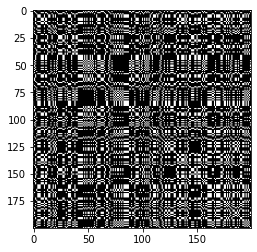

In [10]:
dp = generate_dotplot(seq[:200], seq[:200])
plt.imshow(dp, cmap = "gray")